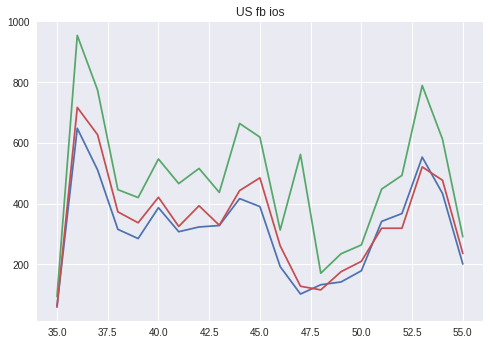

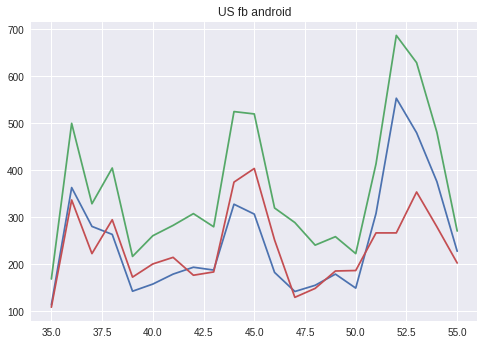

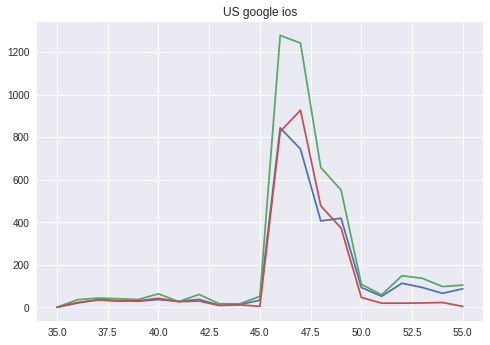

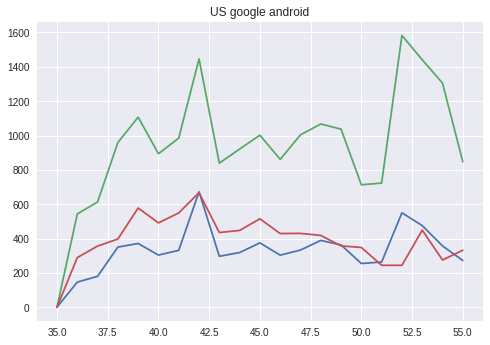

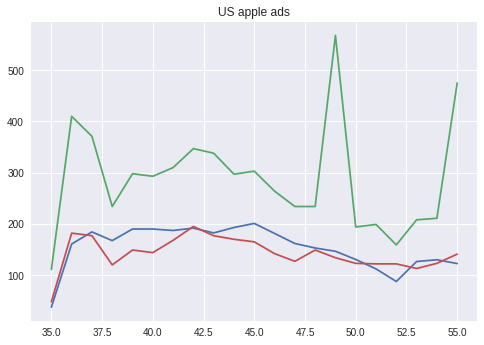

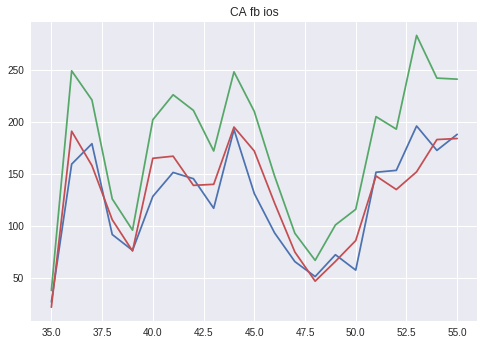

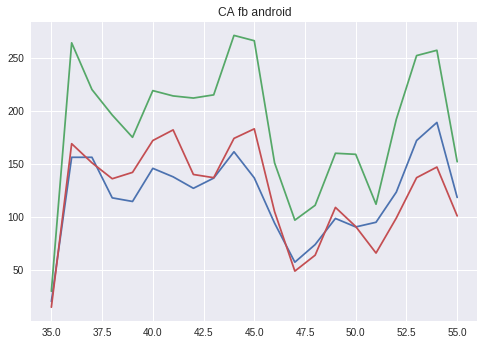

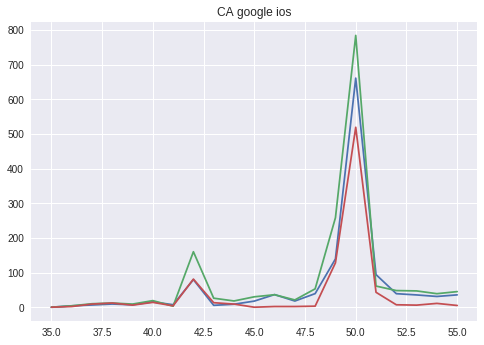

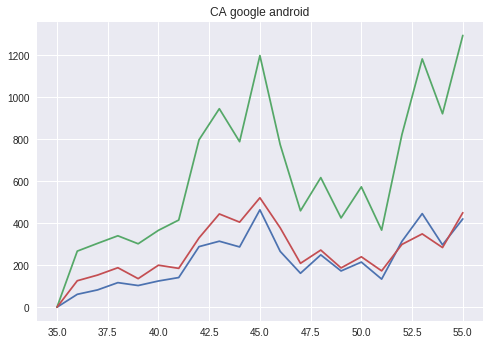

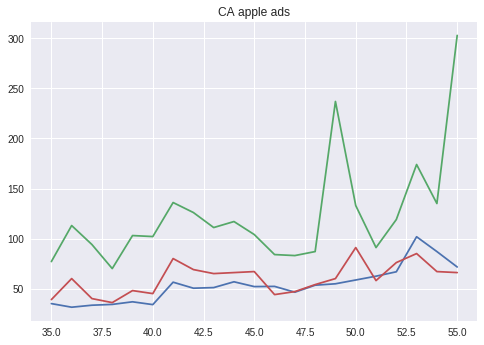

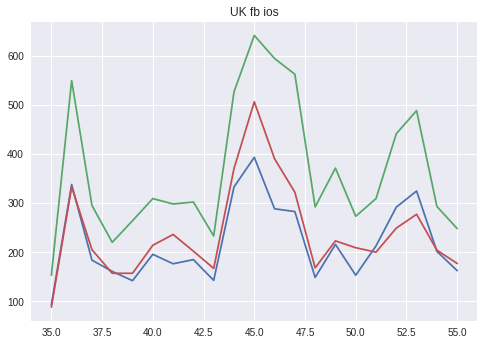

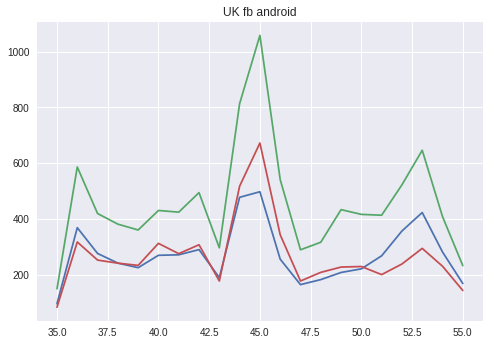

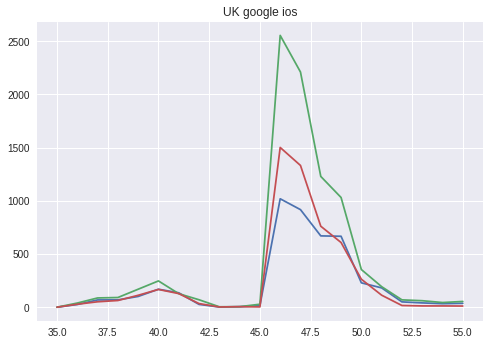

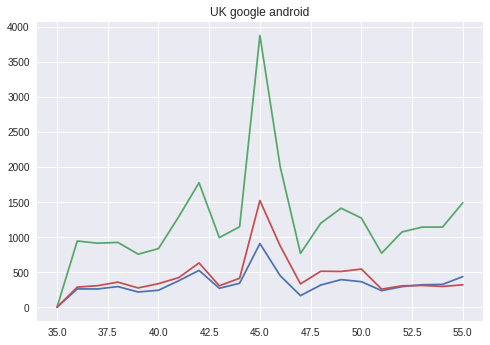

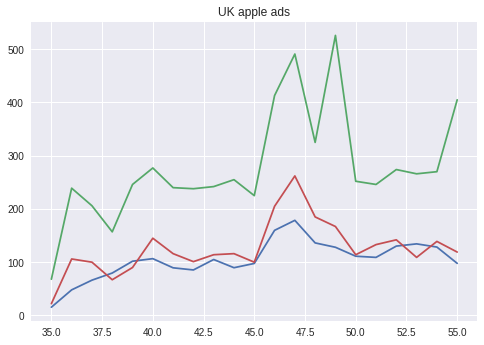

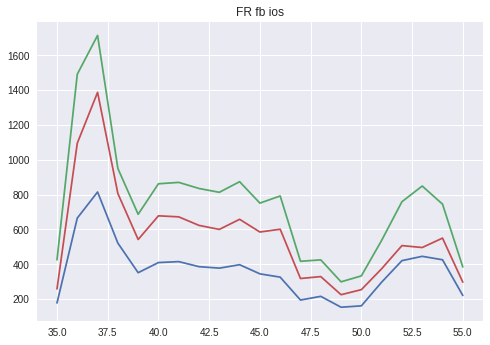

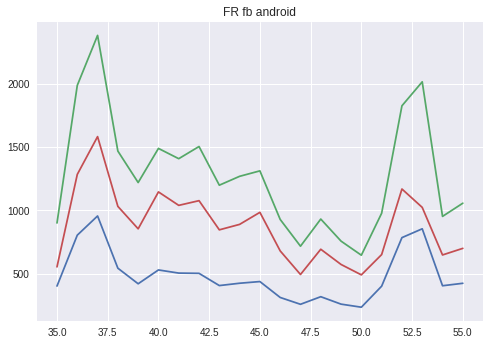

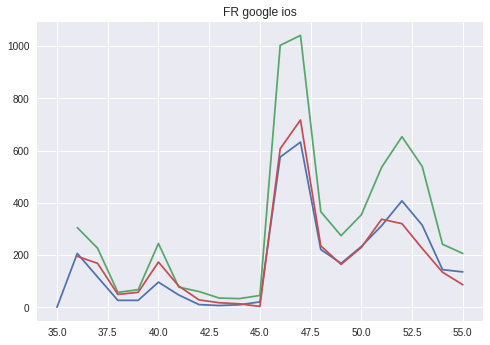

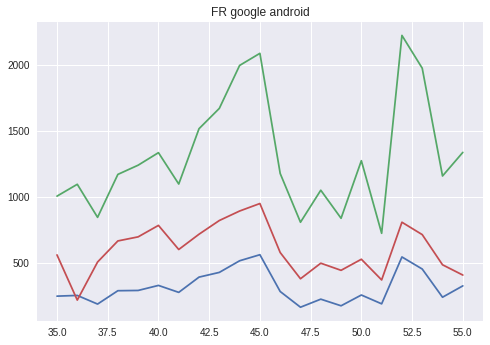

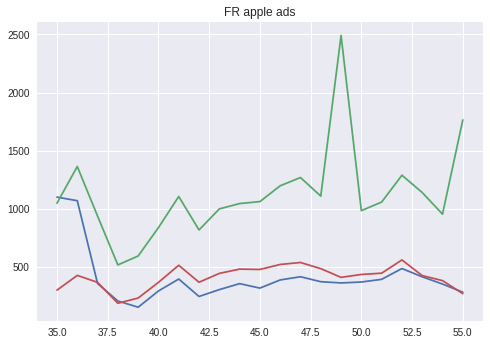

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

spreadsheet = 'Dummy Ad Spend and Results - filled - zero.xlsx'

countries = ['US', 'CA', 'UK', 'FR']

country_columns = ['week',
   'spend fb ios', 'spend fb android', 'spend google ios', 'spend google android', 'spend apple ads','blank 1',
   'installs fb ios', 'installs fb android', 'installs google ios', 'installs google android', 'installs apple ads', 'blank 2',
   'signups fb ios', 'signups fb android', 'signups google ios', 'signups google android', 'signups apple ads', 'blank3',
   'ratio fb ios', 'ratio fb android', 'ratio google ios', 'ratio google android', 'ratio apple ads', 'blank 4',
   'cac fb ios', 'cac fb android', 'cac google ios', 'cac google android', 'cac apple ads', 'blank 5','blank6', 'blank7',
   'total spend', 'total installs', 'total signups', 'signup ratio', 'cpi', 'cac']

metrics = ['spend', 'installs', 'signups']
channels = ['fb ios', 'fb android', 'google ios', 'google android', 'apple ads']

def clean_country(country_name):
  df = pd.read_excel(spreadsheet, sheet_name = country_name)
  df.columns = country_columns
  df = df.drop(0).head(21)
  df['week'] = df['week'].map(lambda n : n+52 if n<35 else n)
  return df

country_data = {  country:clean_country(country) for country in countries }

# funnel per channel
for country, data in country_data.items():
  for channel in channels:
    plt.title('{} {}'.format(country, channel))
    for metric in metrics:
      column = '{} {}'.format(metric, channel)
      plt.plot(data['week'], data[column])
    plt.show()

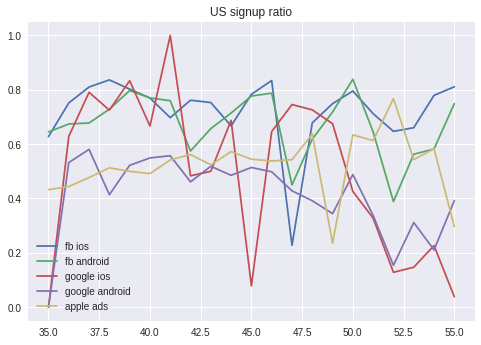

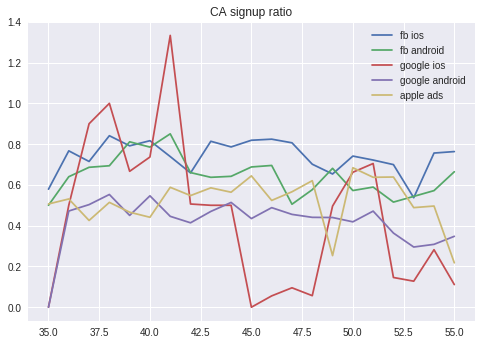

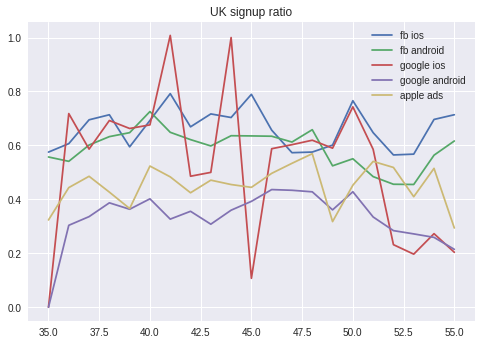

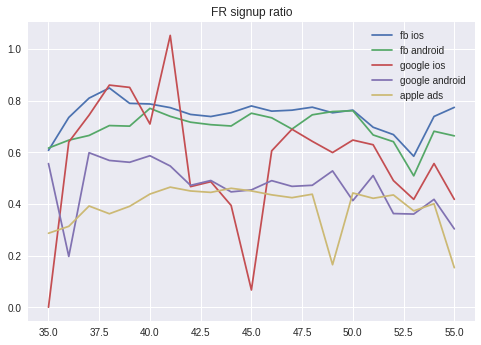

In [33]:
# signup ratio    
for country, data in country_data.items():    
  plt.title('{} signup ratio'.format(country))
  for channel in channels:
    column = 'ratio {}'.format(channel)
    plt.plot(data['week'], data[column], label=channel)
  plt.legend()
  plt.show()
  


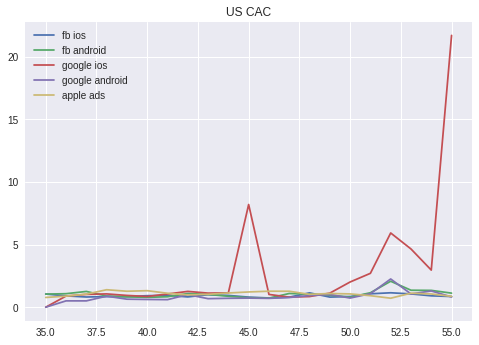

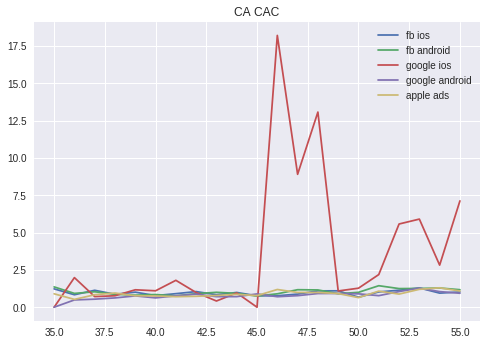

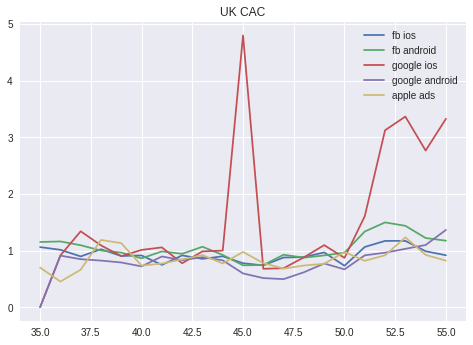

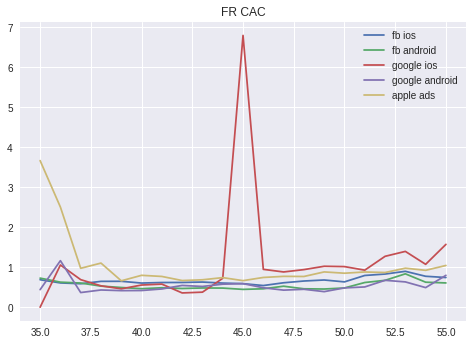

In [29]:
# CAC
for country, data in country_data.items():
  plt.title('{} CAC'.format(country))
  for channel in channels:
    #TODO add legend
    column = 'cac {}'.format(channel)
    plt.plot(data['week'], data[column], label=channel)
  plt.legend()
  plt.show()


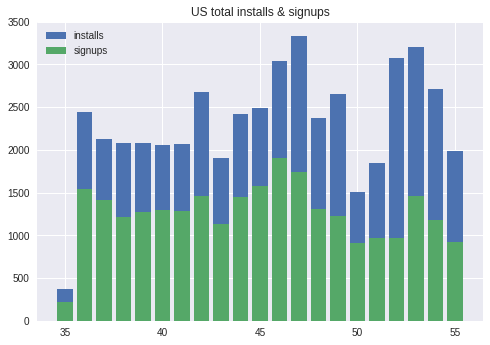

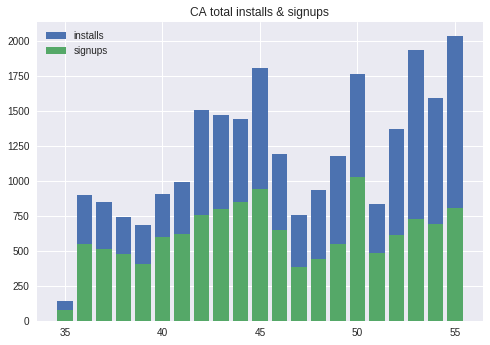

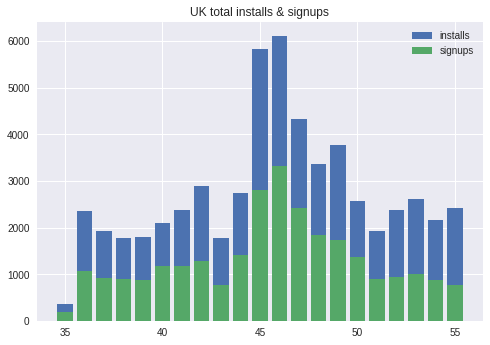

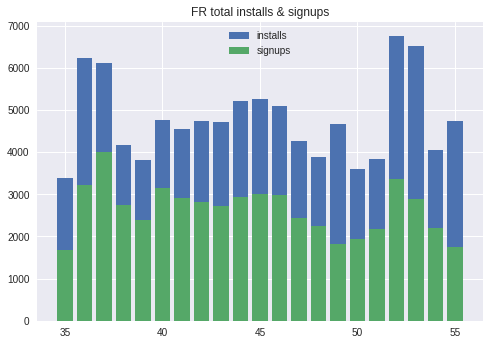

In [30]:
# total installs & signups
for country, data in country_data.items():   
  plt.title('{} total installs & signups'.format(country))
  plt.bar(data['week'], data['total installs'], label='installs')
  plt.bar(data['week'], data['total signups'], label='signups')
  plt.legend()
  plt.show()

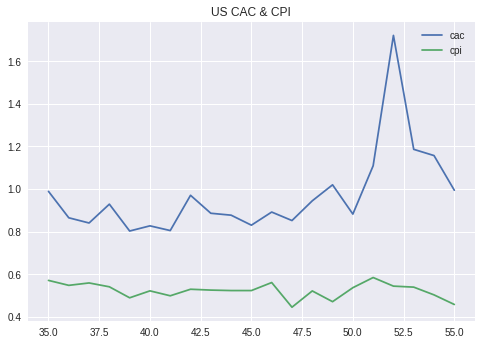

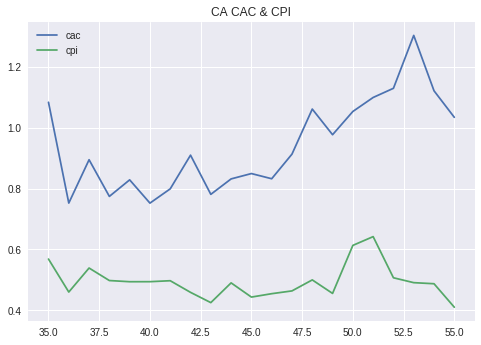

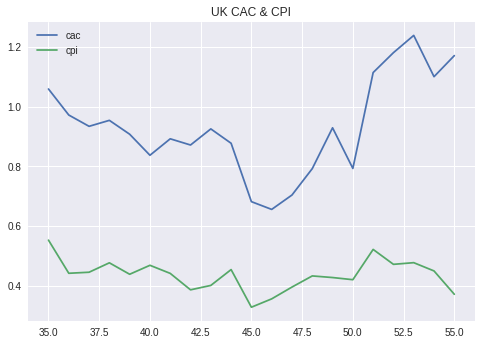

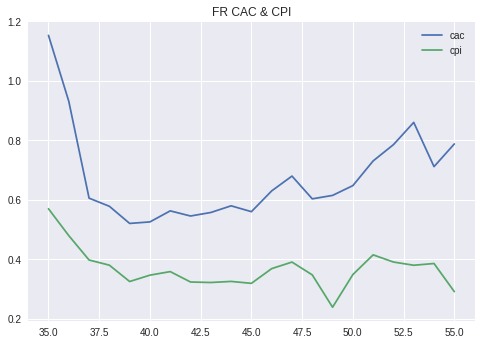

In [31]:
# total CAC & CPI
for country, data in country_data.items():
  plt.title('{} CAC & CPI'.format(country))
  plt.plot(data['week'], data['cac'], label='cac')
  plt.plot(data['week'], data['cpi'], label='cpi')
  plt.legend()
  plt.show()

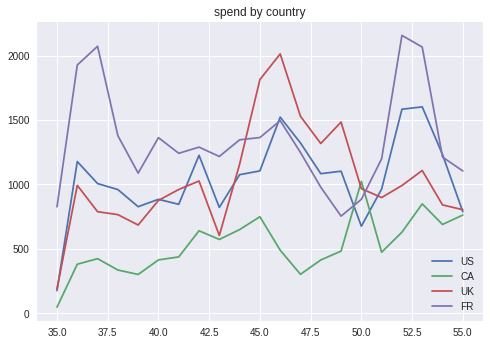

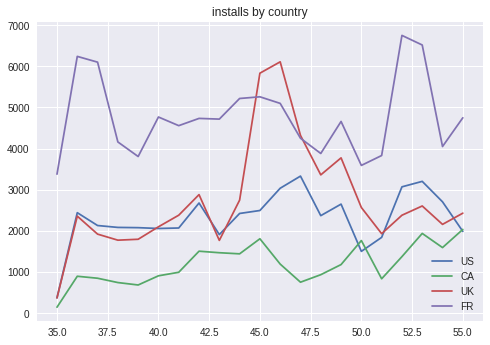

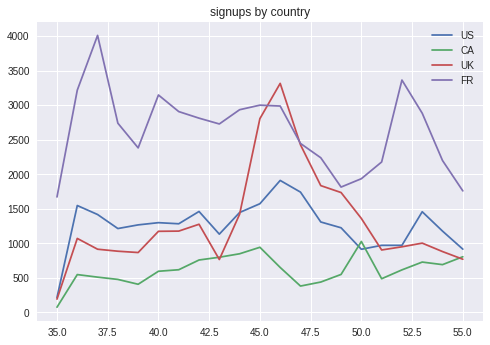

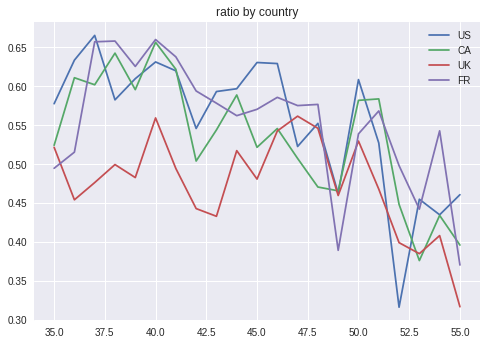

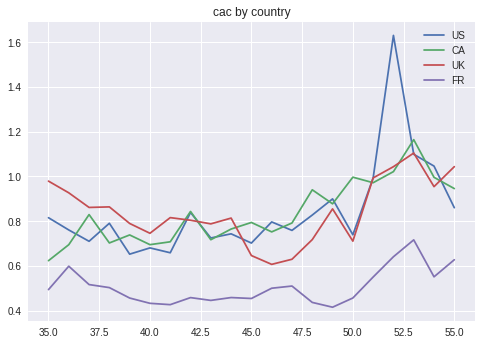

In [25]:
overview = pd.read_excel(spreadsheet, sheet_name='Overview')
overview.columns = ['week',
  'spend US', 'spend CA', 'spend UK', 'spend FR', 'blank 1',
  'installs US', 'installs CA', 'installs UK', 'installs FR', 'blank 2',
  'signups US', 'signups CA', 'signups UK', 'signups FR', 'blank 3',
  'ratio US', 'ratio CA', 'ratio UK', 'ratio FR', 'blank 4',
  'cac US', 'cac CA', 'cac UK', 'cac FR', 'blank 5',
  'total spend', 'total installs', 'total signups', 'signup ratio', 'cpi', 'cac']
overview = overview.drop(0).head(21)
overview['week'] = overview['week'].map(lambda n : n+52 if n<35 else n)

aggregates = ['spend', 'installs', 'signups', 'ratio', 'cac']

for metric in aggregates:
  plt.title('{} by country'.format(metric))
  for country in countries:
    column = '{} {}'.format(metric, country)
    plt.plot(overview['week'], overview[column], label=country)
  plt.legend()
  plt.show()


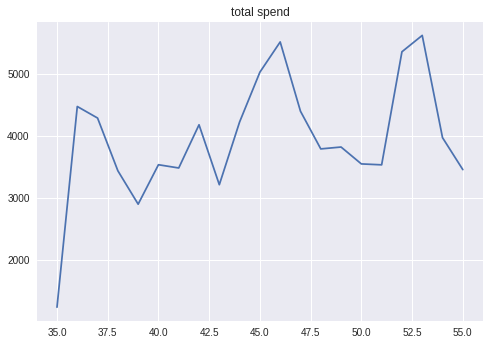

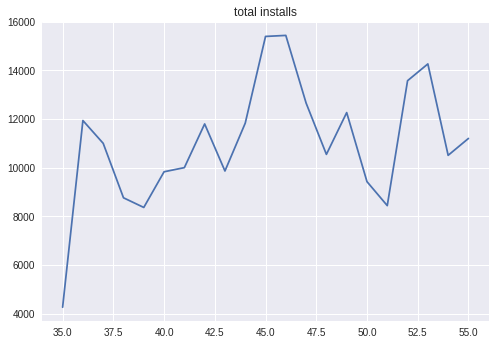

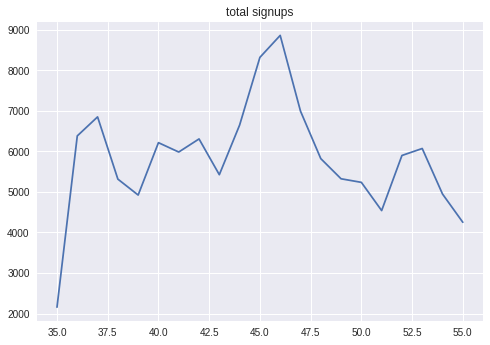

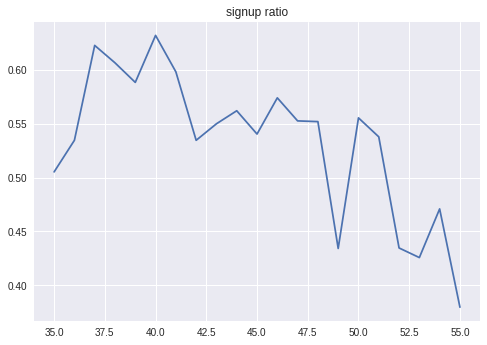

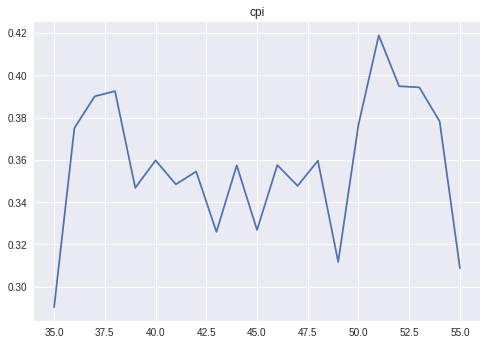

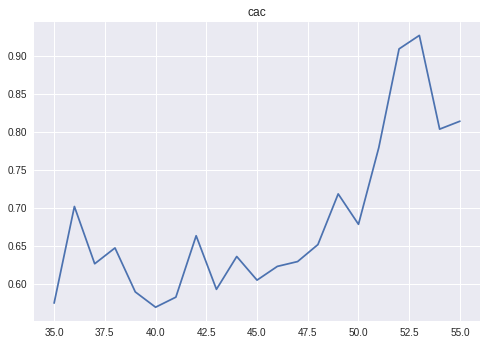

In [26]:
totals = ['total spend', 'total installs', 'total signups', 'signup ratio', 'cpi', 'cac']

for metric in totals:
  plt.title(metric)
  plt.plot(overview['week'], overview[metric])
  plt.show()

In [0]:
#parsing dates (not actually used)

urls = ["https://www.epochconverter.com/weeks/2018/", "https://www.epochconverter.com/weeks/2019/"]
rows =[]
for url in urls:
  r = requests.get(url).text
  soup = BeautifulSoup(r)
  #print(soup.prettify())
  my_table = soup.find('table',{'class':'infotable'})
  table_rows = my_table.find_all('tr')
  
  for tr in table_rows:
      td = tr.find_all('td')
      row = [i.text for i in td]
      rows.append(row)
      
dates = pd.DataFrame(rows)


new_dates = dates.drop([0,1]).reset_index(drop=True)
new_dates['week']=new_dates.index+1
new_dates['start_week'] = pd.to_datetime(new_dates.loc[:,1],format ="%B %d, %Y")
new_dates['end_week'] = pd.to_datetime(new_dates.loc[:,2],format ="%B %d, %Y")
new_dates = new_dates.drop([0,1,2], axis=1)


In [46]:
import sqlite3
conn = sqlite3.connect('analytics.db')

query = '''
CREATE TABLE IF NOT EXISTS metrics (
  year INT, 
  week INT, 
  country VARCHAR(2),
  platform VARCHAR(7),
  channel VARCHAR(6),
  spend FLOAT,
  installs INT,
  signups INT,
  UNIQUE (year, week, country, platform, channel)
);

'''

# country SET('US', 'UK', ...) would be a better option but SQLite doesn't support SET
# year needs to have a constraint mask 20xx, total 4 characters
# week in range 1 - 52
# platform SET ('android, ios')
# channels SET ('facebook', 'google', 'apple')
# spend > 0
# installs and signups >= 0

conn.execute(query)